## Bike Share Demand Forecasting Case Study

### 0. Problem Statement

A US bike-sharing provider **BoomBikes** wants to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**

**We are required to model the demand for shared bikes** with the available independent variables. It will be used by the management,
* to understand how exactly the demands vary with different features
* to change the business strategy to meet the demand levels and meet the customer's expectations.
* to understand the demand dynamics of a new market

### 1. Understand, Prepare & Analyse Data

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

#### 1.1 Import & Understand Data

In [8]:
# Import data into dataframe
df_bikes = pd.read_csv("day.csv")
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
print ("Number of rows: {} and columns: {}\n".format(df_bikes.shape[0], df_bikes.shape[1]))

Number of rows: 730 and columns: 16



#### 1.2 Handle Missing and Bad Quality Data

In [11]:
# Check the data types and null (missing) values
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Observations:
# 1) There are 730 rows and 16 columns
# 2) There is one non-numeric variable (dteday)
# 3) There are no missing values in any of the columns
# 4) The data types for each column are proper, thus it doesn't need a data type conversion
# 5) hum variable has minimum value of 0 while its mean is 62.8. It's unlikely that humidity can be zero. So it's a bad data

In [14]:
# Handle the bad data in hum variable
# Let look at the rows with hum as 0

df_bikes[df_bikes['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,10-03-2018,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,46,577,623


In [15]:
# We can replace the hum value for this row with median of hum values in same month

hum_median = df_bikes[df_bikes['mnth'] == 3][['mnth', 'hum']].groupby(['mnth']).median().reset_index()['hum'][0]
df_bikes.loc[df_bikes['hum'] == 0, 'hum'] = hum_median

In [16]:
# Check the summary again to ensure that the above change is reflected correctly
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.844655,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.047404,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.052075,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### 1.3 Perform Exploratory Data Analysis

In [18]:
# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Get an overall understanding of the column value ranges
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.844655,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.047404,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.052075,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [20]:
# Categorise variables based on Numeric vs. Categorical types

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# There are certain variables which are not relevant for the analysis
# Exclude casual and registered variables as those are included in the target (cnt) variable already and those are not independent features by themselves
extra_vars = ['instant', 'dteday', 'casual', 'registered']

# Check if the sum of length of three arrays is totalling to 16
print("Total variables: " + str(len(cat_vars) + len(num_vars) + len(extra_vars)))

Total variables: 16


In [21]:
# Assign labels for each variable for display on charts

num_labels = ["Temperature in Celcius", "Feeling Temperature in Celsius", "Humidity", "Wind Speed", "No. of Total Rental Bikes"]

cat_labels = ["Season", "Year of Rentals", "Month of Rentals", "Holiday (Yes=1)", "Day of Week", 
              "Working Day (Yes=1)", "Weather Situation"]

In [22]:
# Convert Catrgorical variables with ordinal values to string category names for self-explanatory EDA charts

# Map the ordinal values of season: 1 - Spring; 2 - Summer; 3 - Fall; 4 - Winter
df_bikes.season = df_bikes.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

In [23]:
# Map the ordinal values of yr: 0 - 2018, 1 - 2019

df_bikes.yr = df_bikes.yr.map({0: "2018", 1: "2019"})

# Map the ordinal values of mnth: 1 - Jan; ....; 12 - Dec

df_bikes.mnth = df_bikes.mnth.map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", \
                                   9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

# Map the ordinal values of weekday: 0 - Sun; ....; 6 - Sat

df_bikes.weekday = df_bikes.weekday.map({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

# Map the ordinal values of weathersit: 1 - Clearday; 2 - Cloudyday; 3 - Wetday; 4 - Rainyday
df_bikes.weathersit = df_bikes.weathersit.map({1: "Clearday", 2: "Cloudyday", 3: "Wetday", 4: "Rainyday"})

In [24]:
# Check if the mapping is done appropriately
df_bikes[cat_vars].value_counts()

season  yr    mnth  holiday  weekday  workingday  weathersit
Winter  2019  Nov   0        Fri      1           Clearday      5
Fall    2018  Aug   0        Mon      1           Clearday      5
        2019  Aug   0        Thu      1           Clearday      5
        2018  Jul   0        Sat      0           Clearday      5
              Aug   0        Tue      1           Clearday      5
                                                               ..
Spring  2019  Jan   0        Tue      1           Cloudyday     1
              Mar   0        Sat      0           Clearday      1
                             Sun      0           Cloudyday     1
Summer  2018  Apr   0        Fri      1           Clearday      1
Winter  2019  Sep   0        Wed      1           Clearday      1
Name: count, Length: 397, dtype: int64

In [25]:
# Visualise numerical variables using histplot and boxplot (univariate analysis)

# Define a function to draw histplot and boxplot
def visualize_num_variables (num_cols, xaxis_labels, df):
    rows = len(num_cols)
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in num_cols:
        sns.histplot(data=df, x=i, ax=ax[graph_cnt, 0], color=color_dict.get(graph_cnt%5))
        sns.boxplot(data=df, x=i,  ax=ax[graph_cnt, 1], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt, 0].set_title("Frequency Distribution of " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt, 0].set(xlabel=xaxis_labels[graph_cnt])
        ax[graph_cnt, 1].set_title("Summary View for " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt, 1].set(xlabel=xaxis_labels[graph_cnt])
        graph_cnt += 1
    plt.show()

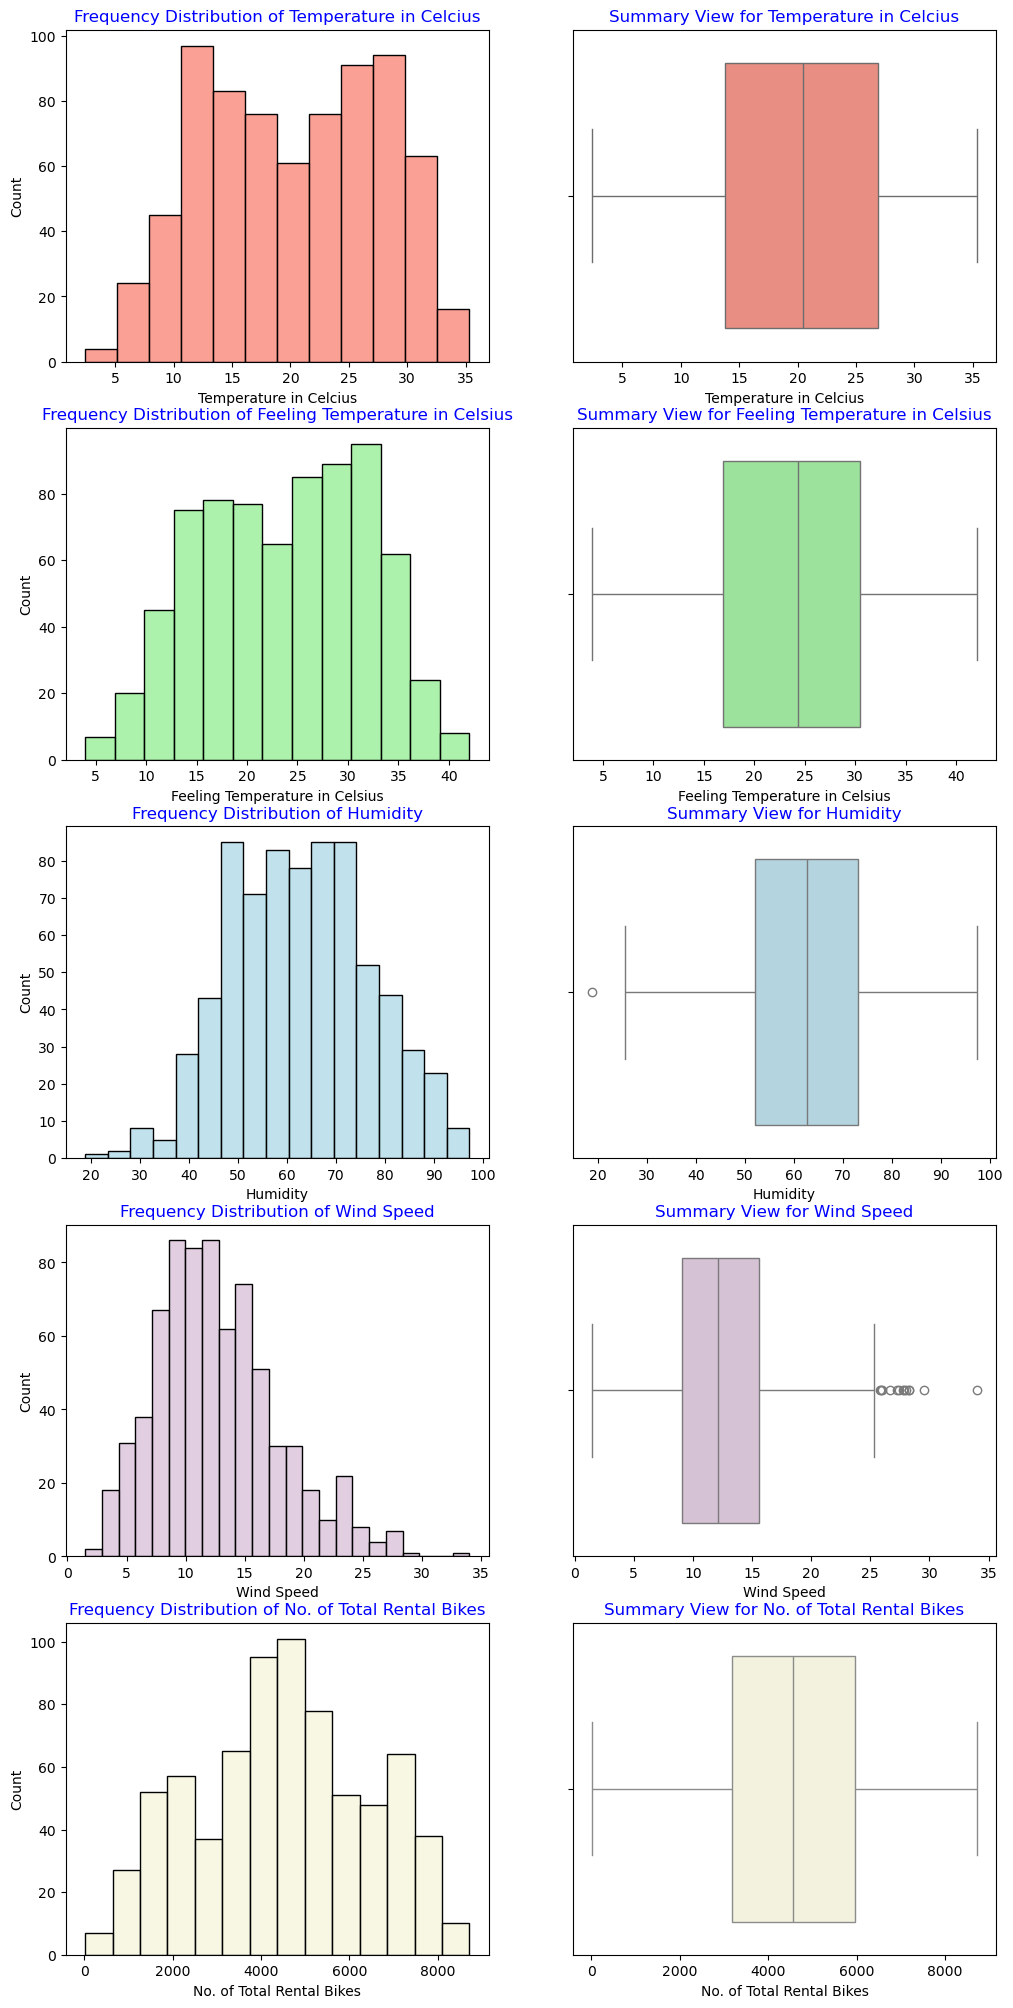

In [26]:
# Plot the graphs for numeric variables
visualize_num_variables(num_vars, num_labels, df_bikes)

In [27]:
# Observations from univariate analysis of Numeric Features:

# 1) The number of days with temperature between 12-15 C and 25-28 C are highest

# 2) Feeling temperature is about 4 C higher than actual temperature

# 3) Most days there are minimum 40 % of humidity prevailing in the air

In [28]:
# Visualise categorical variables using countplot (univariate analysis)

def visualize_cat_variables (cat_cols, xaxis_labels, df):
    rows = len(cat_cols)//2 + len(cat_cols) % 2
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        sns.countplot(data=df, x=i, ax=ax[graph_cnt // 2, graph_cnt % 2], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt // 2, graph_cnt % 2].set_title("Frequency Distribution of " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt // 2, graph_cnt % 2].set(xlabel=xaxis_labels[graph_cnt])
        graph_cnt += 1
    plt.show()

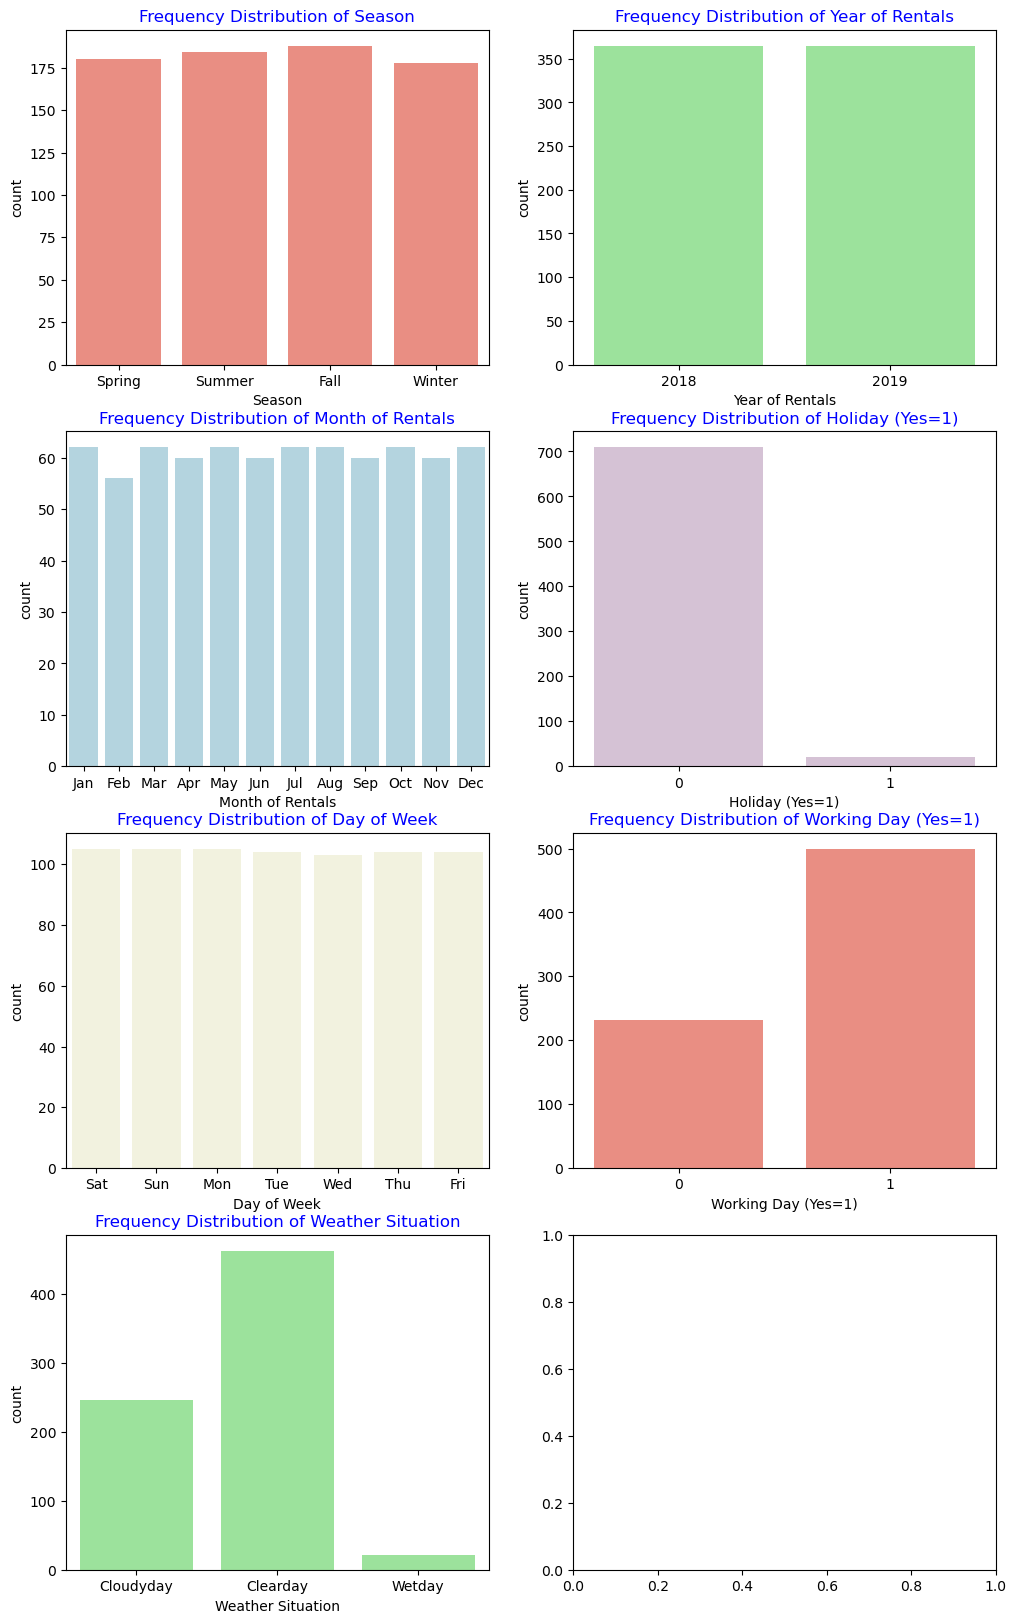

In [29]:
# Plot the graphs for Categorical variables
visualize_cat_variables(cat_vars, cat_labels, df_bikes)

In [30]:
# Observations from univariate analysis of Categorical Features:

# 1) The count of categorical variables reflect the number of days within the data set that come under that category e.g. month, season, day of week etc.

# 2) The number of days with light (Wetday) or heavy rain is very few in the subject locality

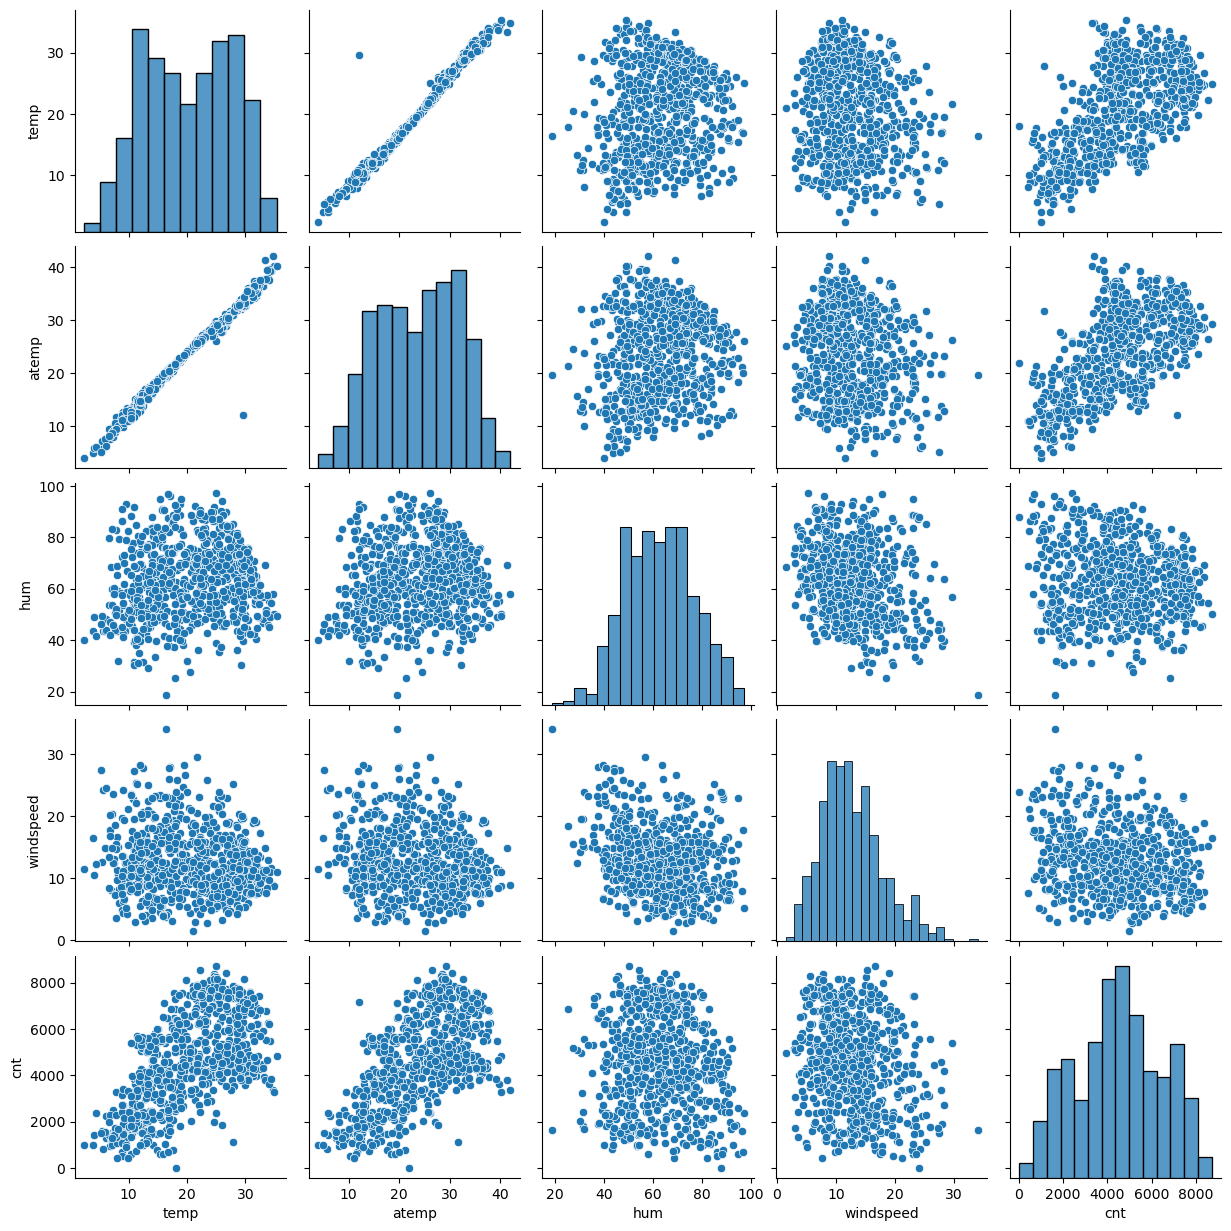

In [31]:
# Visualise all numeric variables in pairwise plots (bivariate analysis)
sns.pairplot(df_bikes[num_vars])
# plt.suptitle("Pair Plot of All Numeric Features")
plt.show()

In [32]:
# Observations from bivariate analysis of Numerical features:

# 1) There is a linear relatioship between actual/ feeling temperature and number of bike rentals

# 2) Humidity and Windspeed don't influence the bike rentals directly

# 3) Actual and Feeling Temperature has high collinearity between them

# 4) Humidity and Windspeed are non-collinear to other features

In [33]:
# Visualise influence of Categorical variables on Target Variable (bivariate analysis)

# Target variables are those which determine bike demands
# Our primary target variable is cnt (Total Daily Rental Bikes)

target_var = 'cnt'

In [34]:
# Define a function to visualize influence of categorical variables on numeric target variable (cnt)
# The method below draws box plot

def bva_num_cat_vars (df, cat_cols, xaxis_labels, target_var, yaxis_label):
    rows = len(cat_cols)//2 + len(cat_cols) % 2
    fig, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        axis = ax[graph_cnt // 2, graph_cnt % 2]
        sns.boxplot(data=df, x=i, y=target_var, ax=axis, color=color_dict.get(graph_cnt%5))
        # axis.set_title(xaxis_labels[graph_cnt]+" Vs. "+yaxis_label, color='blue')
        axis.set(xlabel=xaxis_labels[graph_cnt], ylabel=yaxis_label)
        graph_cnt += 1
    fig.suptitle("Categorical Features Vs. "+yaxis_label, color='blue', y=0.91)
    plt.show()

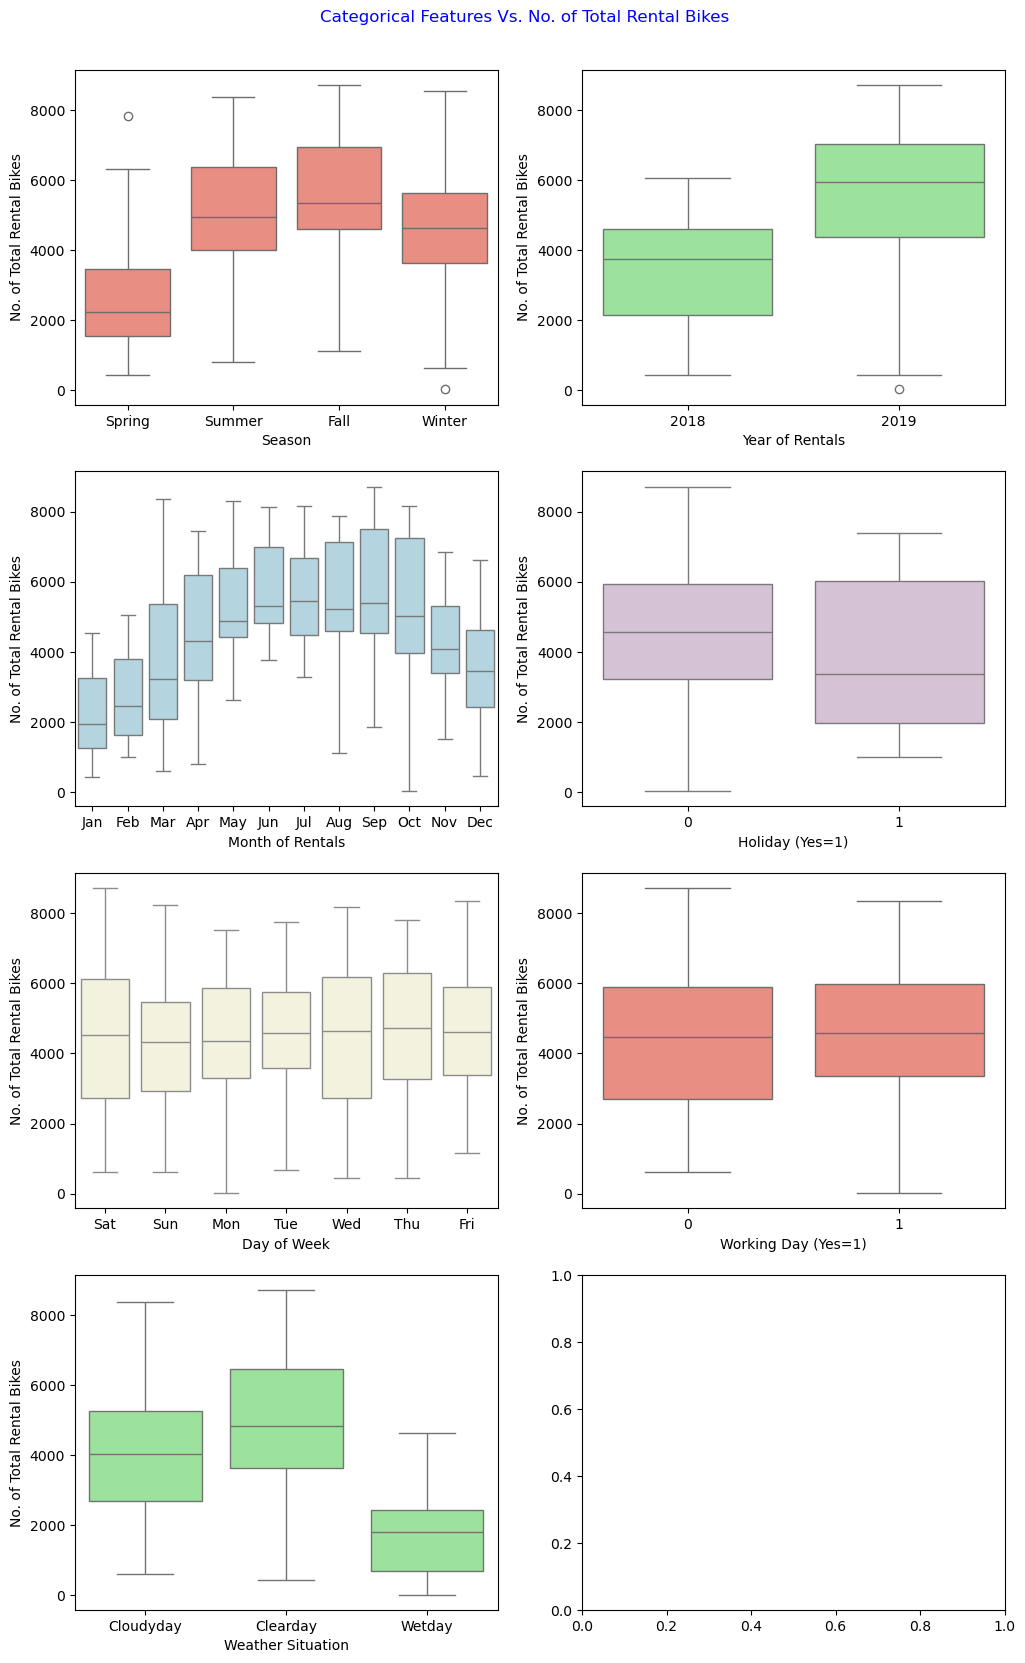

In [35]:
# Draw the boxplots between Categorical & Target Variable
bva_num_cat_vars(df_bikes, cat_vars, cat_labels, target_var, "No. of Total Rental Bikes")

In [36]:
# Observations from bivariate analysis of Categorical features on Bike Rentals:

# 1) Fall & Summer seasons attract more number of users to rent bikes than Spring or Winter

# 2) Year 2019 saw more rentals than 2018 indicating a better awareness and hence usage of the rental facility year on year

# 3) Monthwise, July and Sept saw higher demands while Jan & Feb were lean months

# 4) There are relatively less rentals on holidays than other days

# 5) There were not much variation in demands across days of the week with working days getting slightly higher demands

# 6) Clear days attract more users to rent bikes than other weather situations

# 7) There are no heavy rain or heavy snow days in the subject area

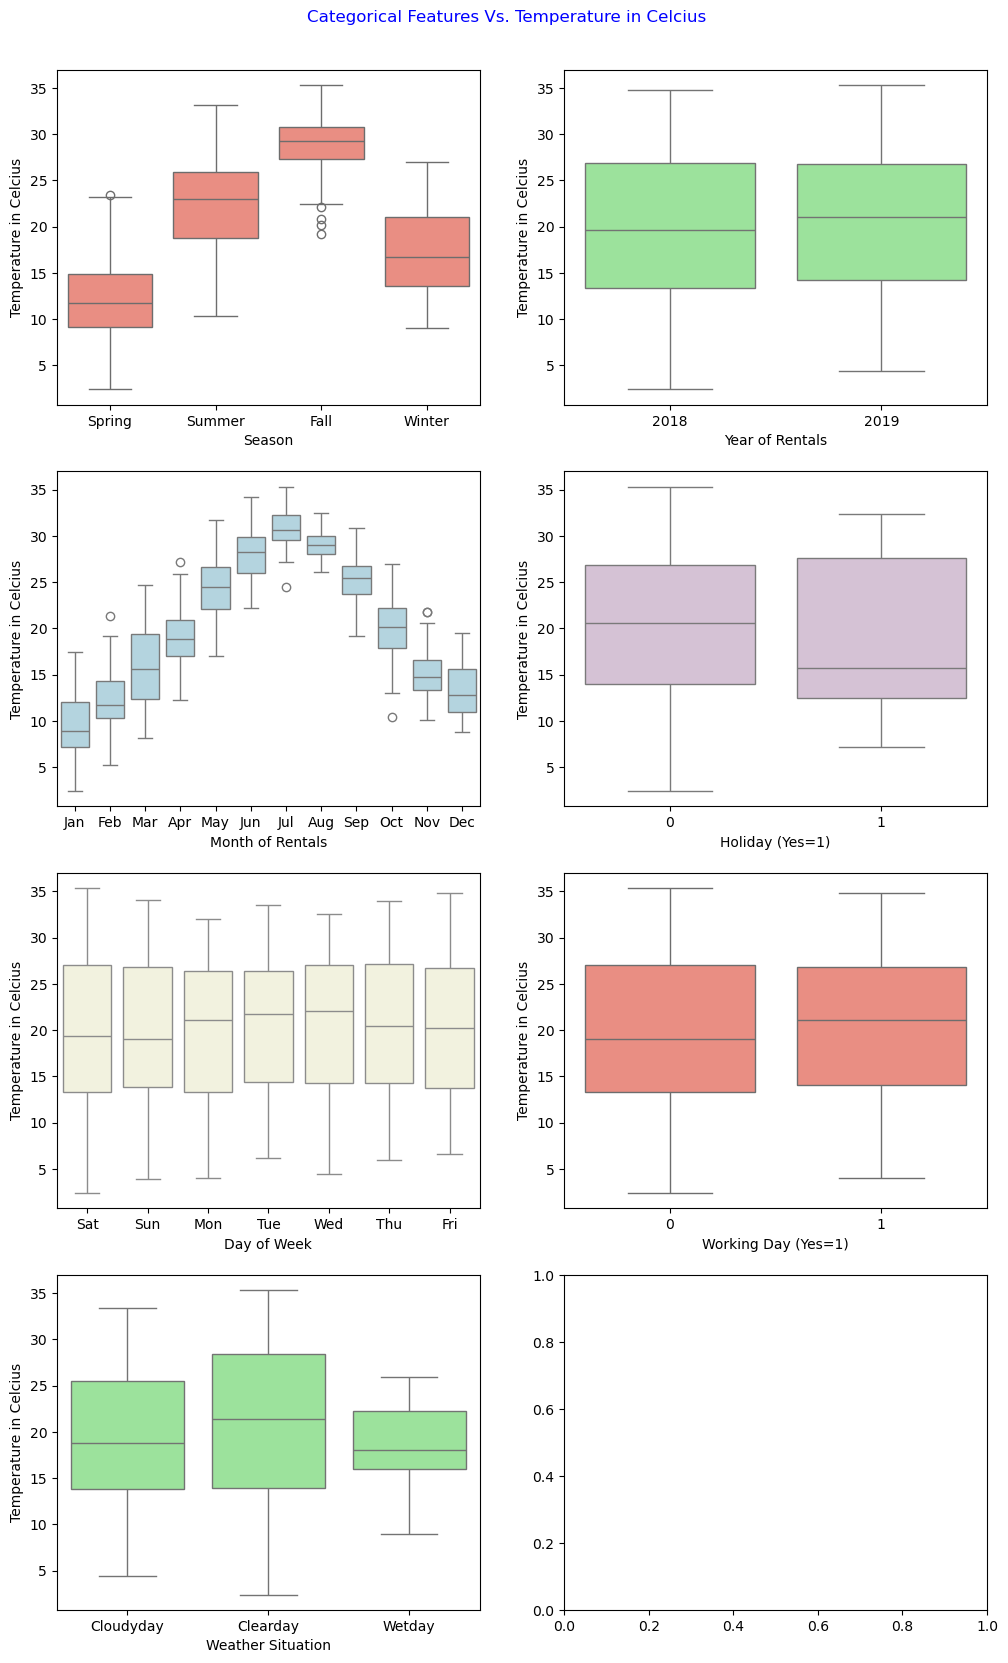

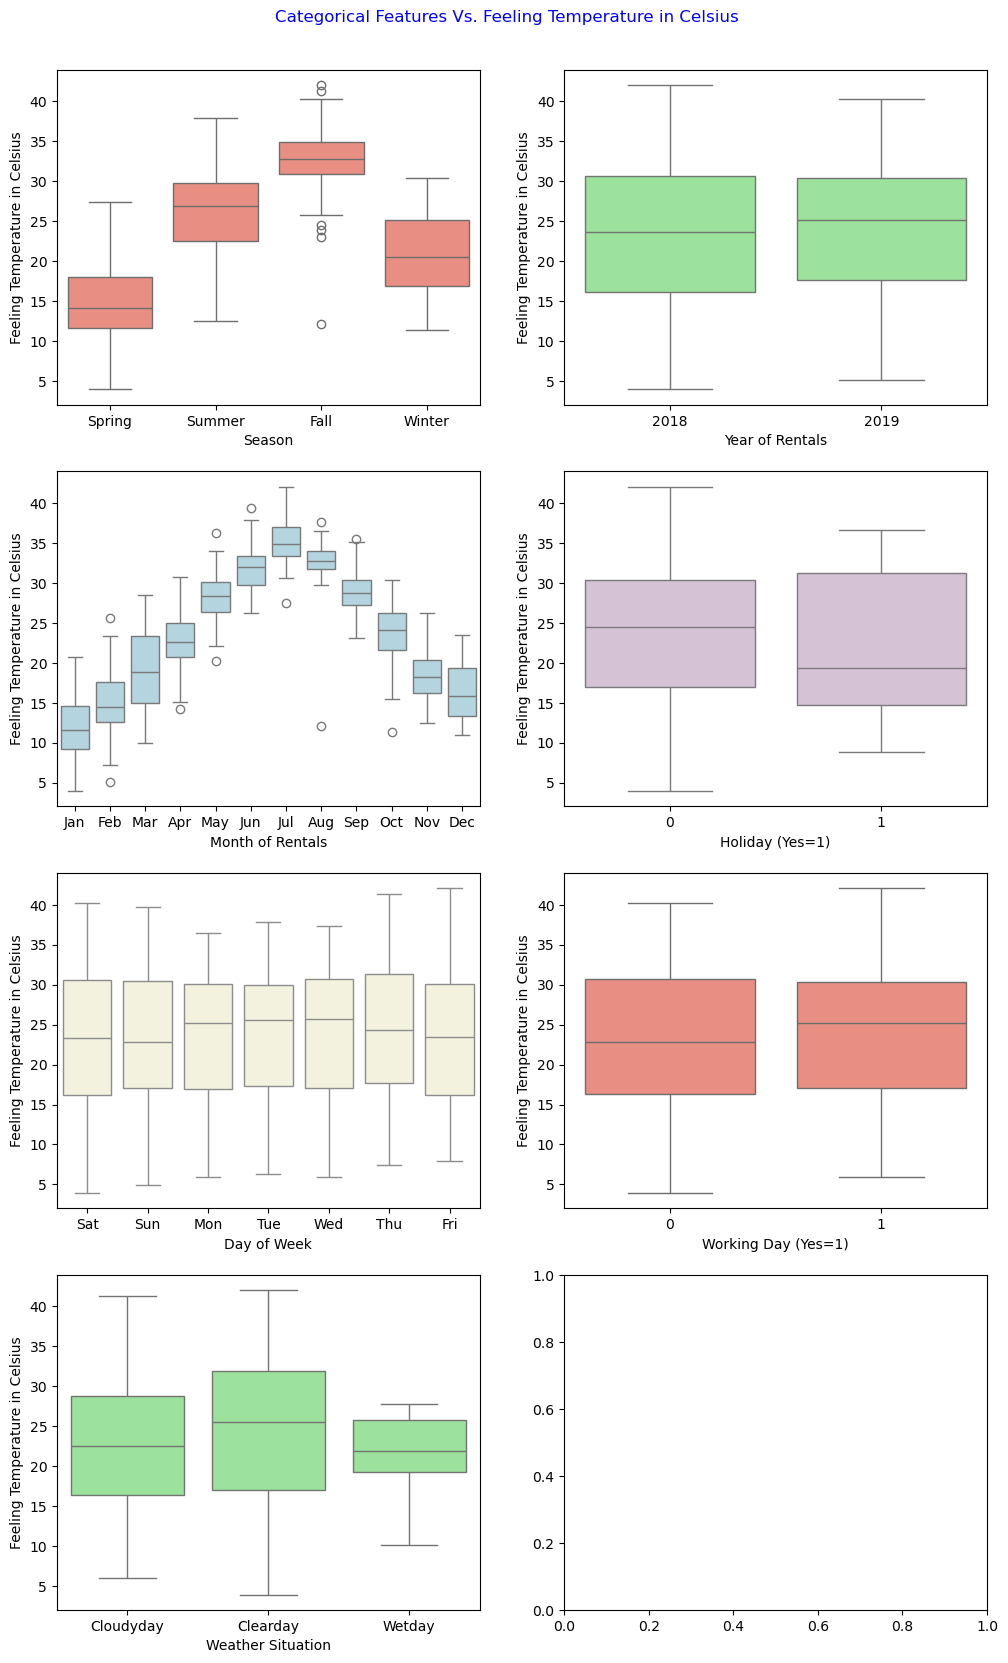

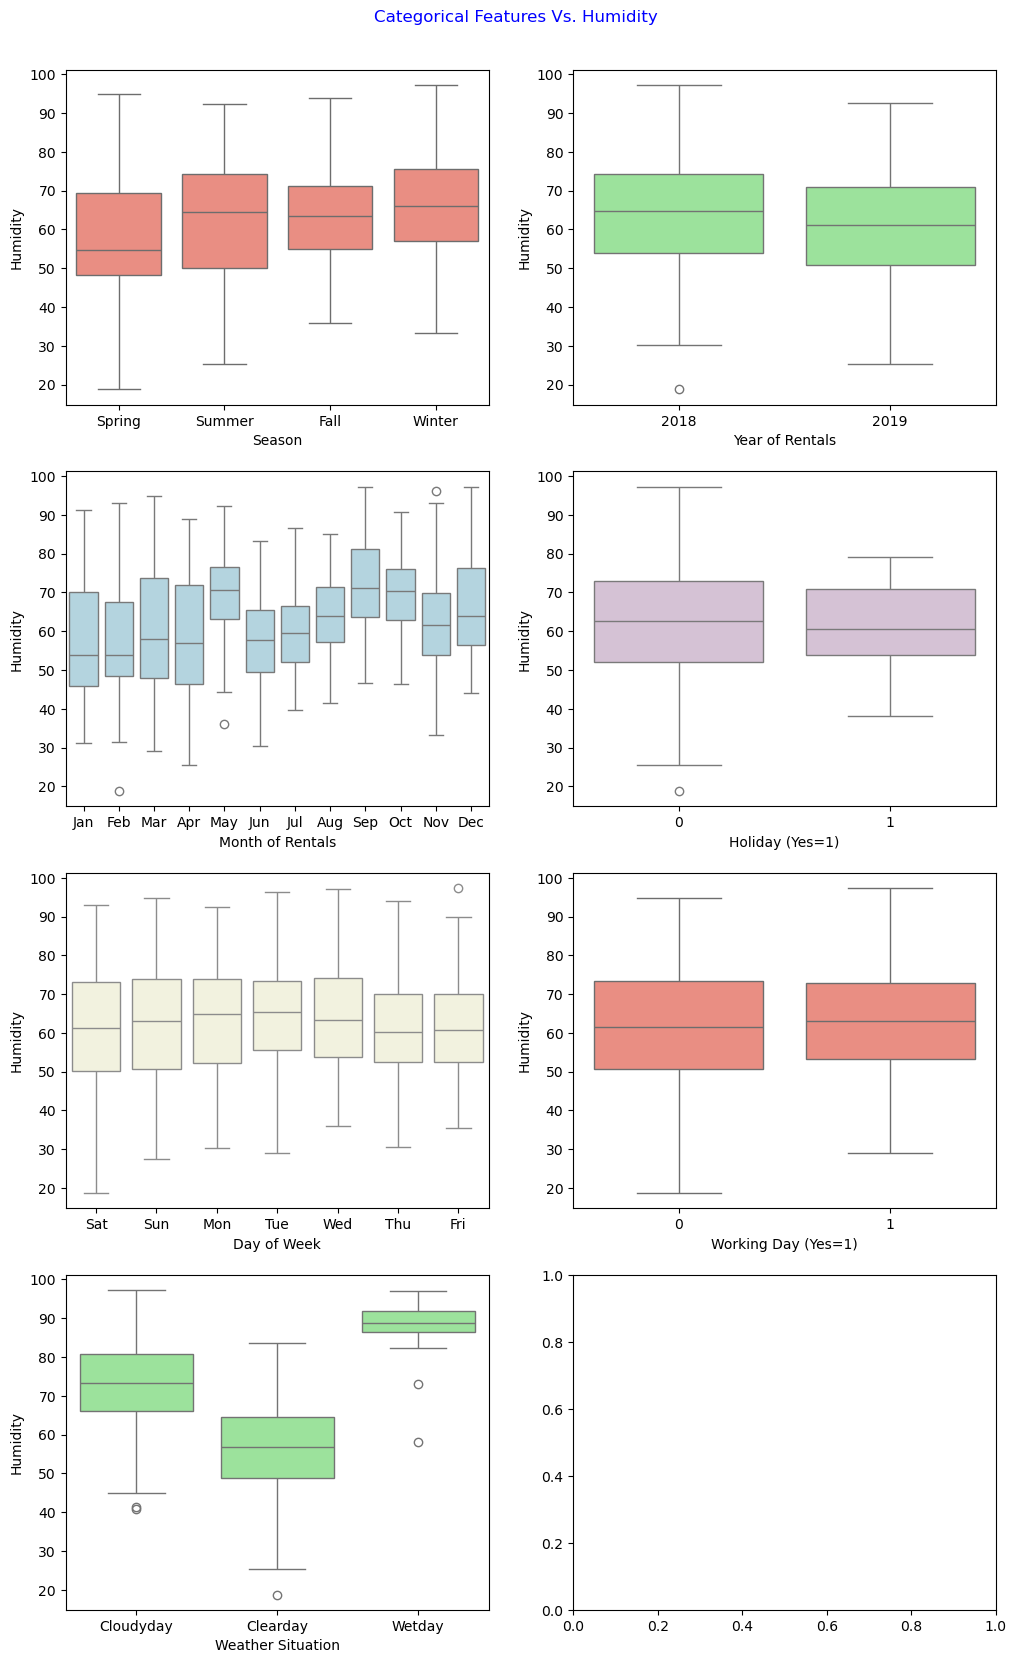

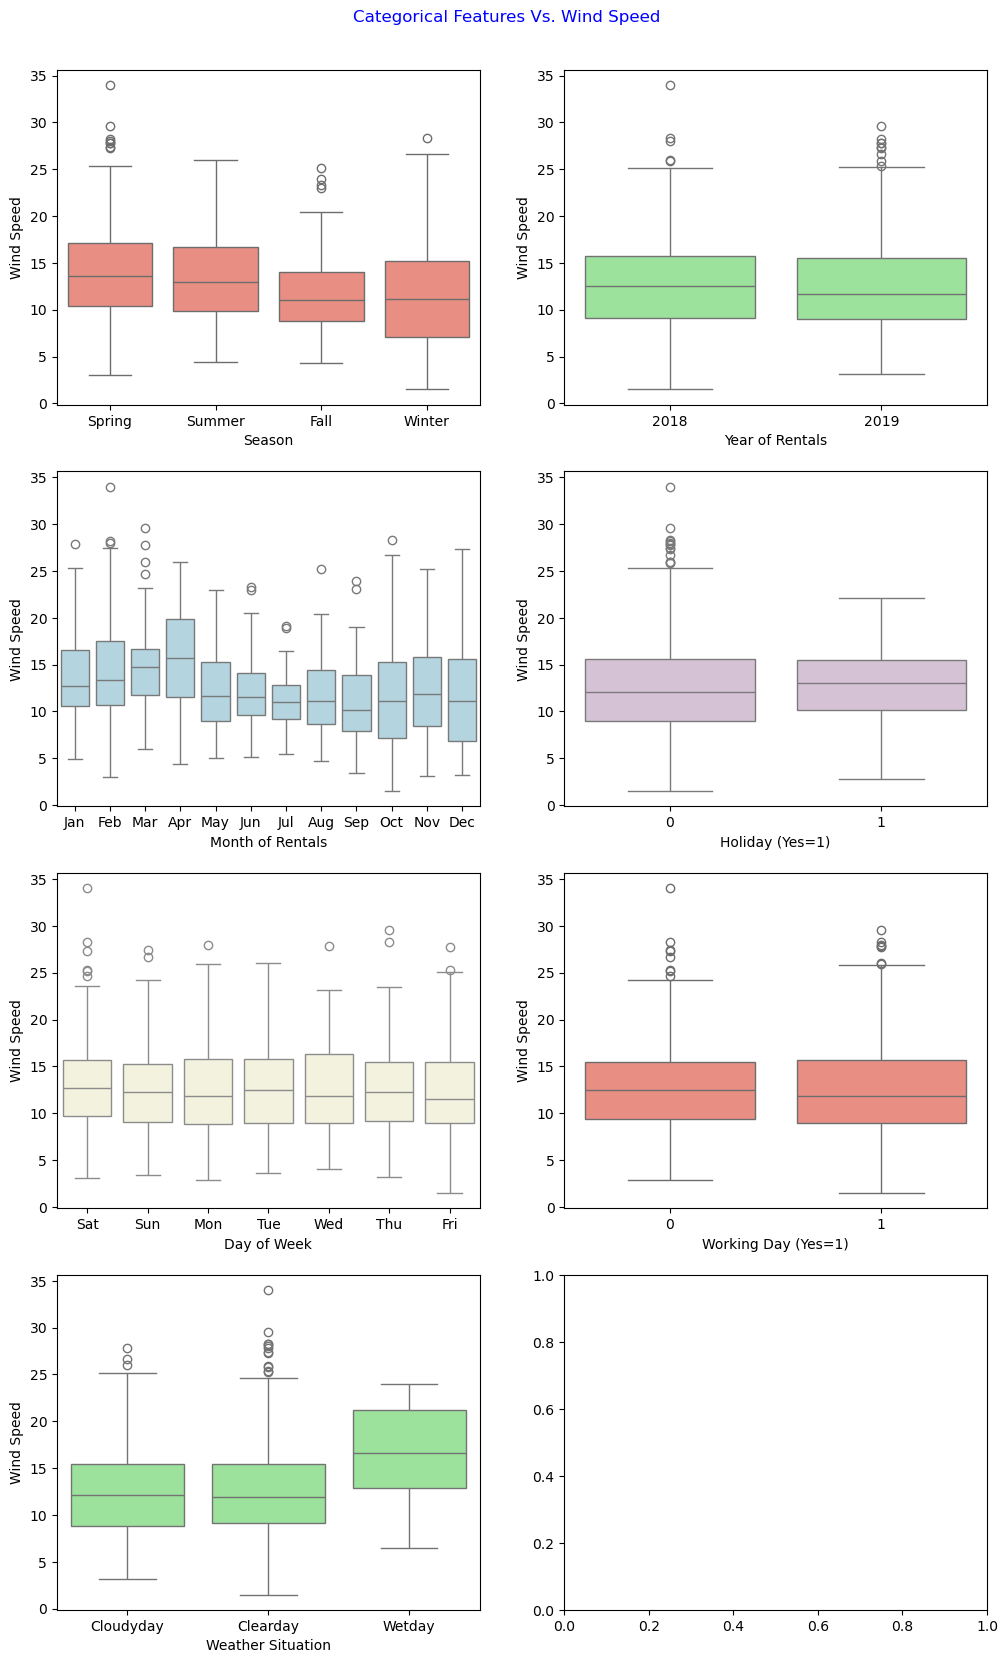

In [37]:
# Draw the boxplots between Categorical & Numeric (other than cnt) Variables

for x in num_vars[:-1]:  #Exclude the target variable - cnt
    bva_num_cat_vars(df_bikes, cat_vars, cat_labels, x, num_labels[num_vars.index(x)])

In [38]:
# Observations from bivariate analysis of effect of Categorical features on other Numeric Features:

# 1) Temperature and Feeling Temperature vary widely across various seasons and months indicating some relationship

# 2) Interestingly, temperature is 2 C higher on Working Days

# 3) Temperature falls by about 3 C on Wet days compared to Clear days

# 4) Humidity doesn't vary much across seasons indicating non-collinear relations, but it varies across months

# 5) Humidity is lowest on Clear days and it goes up on Wet and Rainy days

# 6) Windspeed is slightly higher in Mar/ Apr, but otherwise doesn't vary much across months/ seasons

# 7) Windspeed is higher during Rainy days

# 8) The difference in demand between Clear and Wet days is not significant

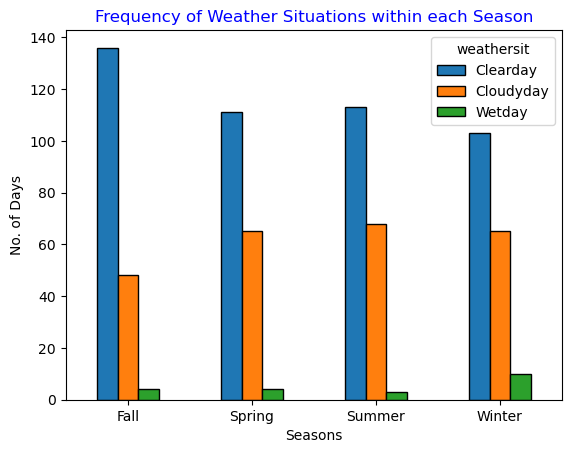

In [39]:
# Draw a bar plot between season and weathersit to see if there exist any pattern

graph_df = (df_bikes
              .groupby(['season'])['weathersit']
              .value_counts(normalize=False)
              .unstack())

graph_df.plot(kind = "bar",
                stacked = False,
                legend = True,
                edgecolor = "black")

# Add title & axis labels
plt.title("Frequency of Weather Situations within each Season", color='blue')
plt.tick_params(labelrotation = 0)
plt.ylabel("No. of Days")
plt.xlabel("Seasons")

# Add legend for the graph
plt.show()

In [40]:
# Observation from above plot:
# Fall has more amenable wather for bike riding with more clear days and less cloudy/ wet days
# Winter on the other hand has least clear days and more cloudy/ wetdays

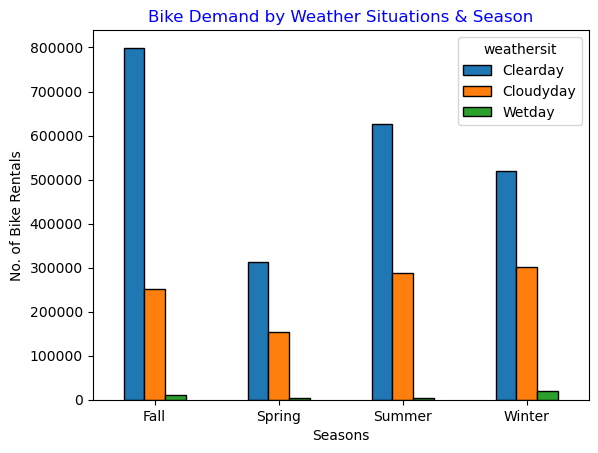

In [41]:
# Draw a bar plot to display variation of bike demands across season and weathersit (multi-variate analysis)

graph_df = (df_bikes
              .groupby(['season', 'weathersit'])['cnt']
              .sum()
              .unstack()
           )

graph_df.plot(kind = "bar",
                stacked = False,
                legend = True,
                edgecolor = "black")

# Add title & axis labels
plt.title("Bike Demand by Weather Situations & Season", color='blue')
plt.tick_params(labelrotation = 0)
plt.ylabel("No. of Bike Rentals")
plt.xlabel("Seasons")

plt.show()

In [42]:
# Observation from above plot (multi-variate analysis):
# Fall exceeds other seasons in terms of total demand because of higher Cleardays
# Winter, though has least clear days and more cloudy/ wetdays, still attracts more Bikers than Spring

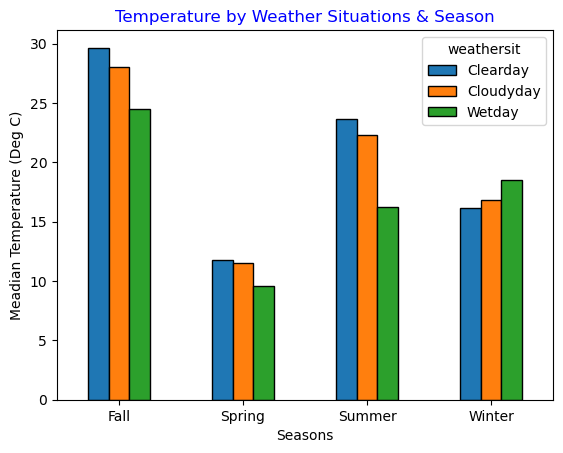

In [43]:
# Draw a bar plot to display variation of temperature across season and weathersit (multi-variate analysis)

graph_df = (df_bikes
              .groupby(['season', 'weathersit'])['temp']
              .median()
              .unstack()
           )

graph_df.plot(kind = "bar",
                stacked = False,
                legend = True,
                edgecolor = "black")

# Add title & axis labels
plt.title("Temperature by Weather Situations & Season", color='blue')
plt.tick_params(labelrotation = 0)
plt.ylabel("Meadian Temperature (Deg C)")
plt.xlabel("Seasons")

plt.show()

In [44]:
# Observation from above plot (multi-variate analysis):
# Fall exceeds other seasons in terms of median temperature across all weather situations
# Winter, though has least clear days and more cloudy/ wetdays, has higher median temperatures than Spring. This explains 
#       higher bike demands in Winter compared to Spring

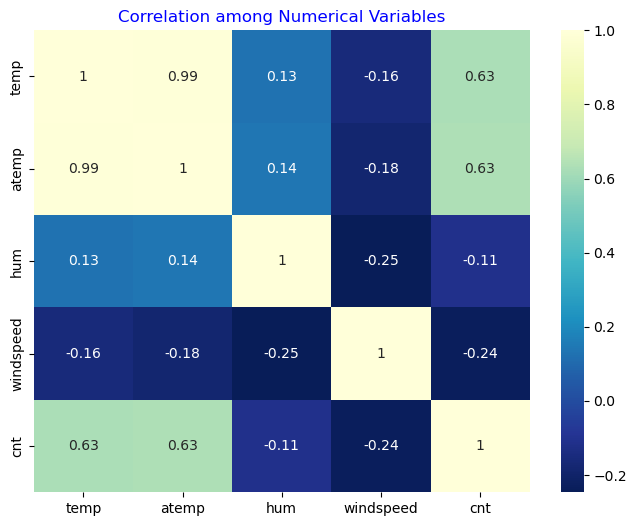

In [45]:
# Create a HeatMap among Numerical Variables to understand correlations among them
plt.figure(figsize=(8, 6))
sns.heatmap(df_bikes[num_vars].corr(),annot=True,cmap="YlGnBu_r")
plt.title("Correlation among Numerical Variables", color='blue')
plt.show()

In [46]:
# Observations from bivariate analysis of Numeric features from Heatmap

# 1) Actual and Feeling Temperatures are highly collinear between them

# 2) Windspeed brings down humidity and temperature slightly, but it reduces demand as well slightly

#### 1.4 Handle & Transform (Create Dummies) Categorical Variables

In [48]:
# Transform the Categorical features as required to enable those to be handled by the model appropriately
# cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# Variables which are already in two levels (0/1) and don't need any further transformation - holiday, workingday
# yr needs to be mapped backed to 0/1 values
# mnth and weekday features are having an ordinality (in original data set) which is reflected through 1-12 / 0-6 coding 
#     i.e. Mar(3) comes after Feb(2). Hence we could retain their existing encoding. But for this exercise, those will be transformed
# weathersit feature is encoded with ordinal values, but there is no real life sequencing among the values, since a specific weather situation 
      # can occur on any day of the year. Hence weathersit needs to be converted to dummy variables
# season feature is encoded with ordinal values, but season 1 (Spring) spans to 1st (Jan) as well as last month (Dec) of the year. 
      # Hence season needs to be converted to dummy variables

In [49]:
# Check the span of seasons across months
df_bikes[['season', 'mnth']].groupby(['season', 'mnth']).count()

Empty DataFrame
Columns: []
Index: [(Fall, Aug), (Fall, Jul), (Fall, Jun), (Fall, Sep), (Spring, Dec), (Spring, Feb), (Spring, Jan), (Spring, Mar), (Summer, Apr), (Summer, Jun), (Summer, Mar), (Summer, May), (Winter, Dec), (Winter, Nov), (Winter, Oct), (Winter, Sep)]

In [50]:
# Map back yr to 0 & 1 values
df_bikes.yr = df_bikes.yr.map({'2018': 0, '2019': 1})
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Cloudyday,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Cloudyday,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clearday,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clearday,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clearday,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
# Create the dummy variables for mnth
month = pd.get_dummies(df_bikes.mnth, drop_first=True, dtype=int)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [52]:
# Concatenate month to main df

df_bikes = pd.concat([df_bikes, month], axis=1)

# drop mnth variable
df_bikes.drop(['mnth'], axis = 1, inplace = True)

# Review the transformation
df_bikes.head(3)

,instant,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,Spring,0,0,Sat,0,Cloudyday,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,Spring,0,0,Sun,0,Cloudyday,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,Spring,0,0,Mon,1,Clearday,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0


In [53]:
# Create the dummy variables for weekday
weekday = pd.get_dummies(df_bikes.weekday, drop_first=True, dtype=int)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [54]:
# Concatenate weekday to main df

df_bikes = pd.concat([df_bikes, weekday], axis=1)

# drop weekday variable
df_bikes.drop(['weekday'], axis = 1, inplace = True)

# Review the transformation
df_bikes.head(3)

,instant,dteday,season,yr,holiday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,01-01-2018,Spring,0,0,0,Cloudyday,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,Spring,0,0,0,Cloudyday,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,Spring,0,0,1,Clearday,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# Create the dummy variables for weathersit
weather = pd.get_dummies(df_bikes.weathersit, drop_first=True, dtype=int)
weather.head()

,Cloudyday,Wetday
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [56]:
# Concatenate weather to main df

df_bikes = pd.concat([df_bikes, weather], axis=1)

# drop weathersit variable
df_bikes.drop(['weathersit'], axis = 1, inplace = True)

# Review the transformation
df_bikes.head(3)

,instant,dteday,season,yr,holiday,workingday,temp,atemp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudyday,Wetday
0,1,01-01-2018,Spring,0,0,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,2,02-01-2018,Spring,0,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,1,0
2,3,03-01-2018,Spring,0,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0


In [57]:
# Create the dummy variables for season
season = pd.get_dummies(df_bikes.season, drop_first=True, dtype=int)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [58]:
# Concatenate season to main df

df_bikes = pd.concat([df_bikes, season], axis=1)

# drop season variable
df_bikes.drop(['season'], axis = 1, inplace = True)

# Review the transformation
df_bikes.head(3)

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Sat,Sun,Thu,Tue,Wed,Cloudyday,Wetday,Spring,Summer,Winter
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,1,0,0,0,0,1,0,1,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,1,0,0,0,1,0,1,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0


#### 1.5 Derive New Metrics & Analyse

In [60]:
# Let's explore if any combination of existing features accentuate the rental demand

# Create a function to draw scatter plot between two variables

def draw_scatter (x_var, x_label, y_var, y_label, title):
    fig = plt.figure(figsize=(5,4))
    plt.scatter(x_var, y_var)
    fig.suptitle(title, fontsize = 14, color='blue')              
    plt.xlabel(x_label, fontsize = 12)      
    plt.ylabel(y_label, fontsize = 12)
    plt.show()

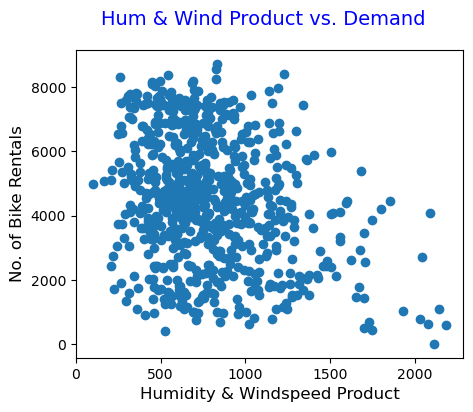

In [61]:
# Check product of hum & windspeed vs. rental demand

df_bikes['humwindprod'] = df_bikes['hum']* df_bikes['windspeed']

draw_scatter(df_bikes['humwindprod'], 'Humidity & Windspeed Product', df_bikes['cnt'], 'No. of Bike Rentals', 'Hum & Wind Product vs. Demand')

In [62]:
# Observation:
# There is no linear relationship between humwindprod and Demand

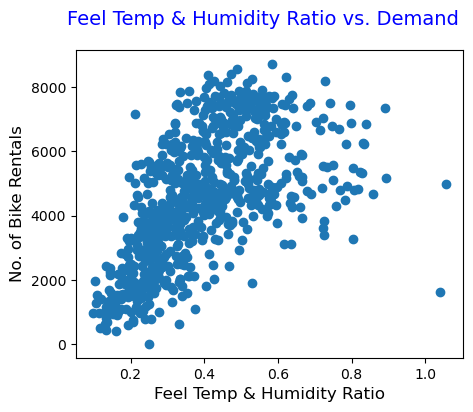

In [63]:
# Check ratio of atemp & hum vs. rental demand

df_bikes['atemphumratio'] = df_bikes['atemp']/ df_bikes['hum']

draw_scatter(df_bikes['atemphumratio'], 'Feel Temp & Humidity Ratio', df_bikes['cnt'], 'No. of Bike Rentals', 'Feel Temp & Humidity Ratio vs. Demand')

In [64]:
# Check for correlation between the derived metric and Demand
df_bikes[['atemphumratio', 'cnt']].corr()

,atemphumratio,cnt
atemphumratio,1.000000,0.590541
cnt,0.590541,1.000000


In [65]:
# Observation:
# There is some correlationship between atemphumratio and Demand. This can be used for modelling

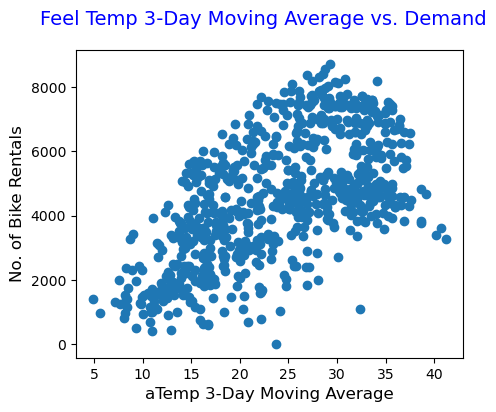

In [66]:
# Compute 3-day moving average of atemp variable and check its impact on demand

df_bikes['mvatemp'] = df_bikes['atemp'].rolling(window=3).mean()

draw_scatter(df_bikes['mvatemp'], 'aTemp 3-Day Moving Average', df_bikes['cnt'], 'No. of Bike Rentals', \
             'Feel Temp 3-Day Moving Average vs. Demand')

In [67]:
# Check for correlation between the derived metric and Demand
df_bikes[['mvatemp', 'cnt']].corr()

,mvatemp,cnt
mvatemp,1.000000,0.612794
cnt,0.612794,1.000000


In [68]:
# Observation:
# Since aTemp itself has a correlation coef of 0.63 with Demand, which is more than aTemp 3-Day moving average, this metric can be dropped

#### 1.6 Prepare Clean Data for Modelling

In [70]:
# We are ready to move into modelling phase. We need to drop unnecessary variables to prepare a clean data set

df_bikes.head(2)

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Tue,Wed,Cloudyday,Wetday,Spring,Summer,Winter,humwindprod,atemphumratio,mvatemp
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,1,0,0,866.260966,0.225621,NaN
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,1,0,0,1159.131938,0.254091,NaN


In [71]:
# Drop the extra variables

df_demand_model = df_bikes.drop(extra_vars, axis=1)

In [72]:
# Drop the derived variables which will not be used for modelling

df_demand_model = df_demand_model.drop(['humwindprod', 'mvatemp'], axis=1)

In [73]:
# Check if there are any missing values in the model dataset

df_demand_model.isnull().sum()

yr               0
holiday          0
workingday       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
Aug              0
Dec              0
Feb              0
Jan              0
Jul              0
Jun              0
Mar              0
May              0
Nov              0
Oct              0
Sep              0
Mon              0
Sat              0
Sun              0
Thu              0
Tue              0
Wed              0
Cloudyday        0
Wetday           0
Spring           0
Summer           0
Winter           0
atemphumratio    0
dtype: int64

In [74]:
df_demand_model.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sun,Thu,Tue,Wed,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,1,0,0,0.225621
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,0,0,0,1,0,1,0,0,0.254091


### 2. Build Model

In [76]:
# Import all model building related libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

#### 2.1 Build Initial Model & Analyse Performance

In [78]:
# Split the data set for training and validation in 70:30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_demand_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
# Scale the feature variables except those with yes-no levels and dummy variables which are already in scaled state

scaler = MinMaxScaler()

rev_num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'atemphumratio']

df_train[rev_num_var] = scaler.fit_transform(df_train[rev_num_var])

In [80]:
df_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sun,Thu,Tue,Wed,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
653,1,0,1,0.509887,0.501133,0.473375,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0.332977
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,0,...,0,0,1,0,0,0,0,0,0,0.394506
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,...,0,0,0,0,1,0,1,0,0,0.248202
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,1,...,1,0,0,0,0,0,1,0,0,0.149432
482,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,0,0,...,0,0,0,0,1,0,0,1,0,0.304161


In [81]:
# Check if all the variables have been scaled between 0 and 1
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sun,Thu,Tue,Wed,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.567859,0.320768,0.513620,0.096078,0.084314,...,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.243137,0.245098,0.24902,0.304035
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.177366,0.169797,0.224593,0.294988,0.278131,...,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.429398,0.430568,0.43287,0.163695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.428913,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.179249
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.570553,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.282653
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.695953,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.404210
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


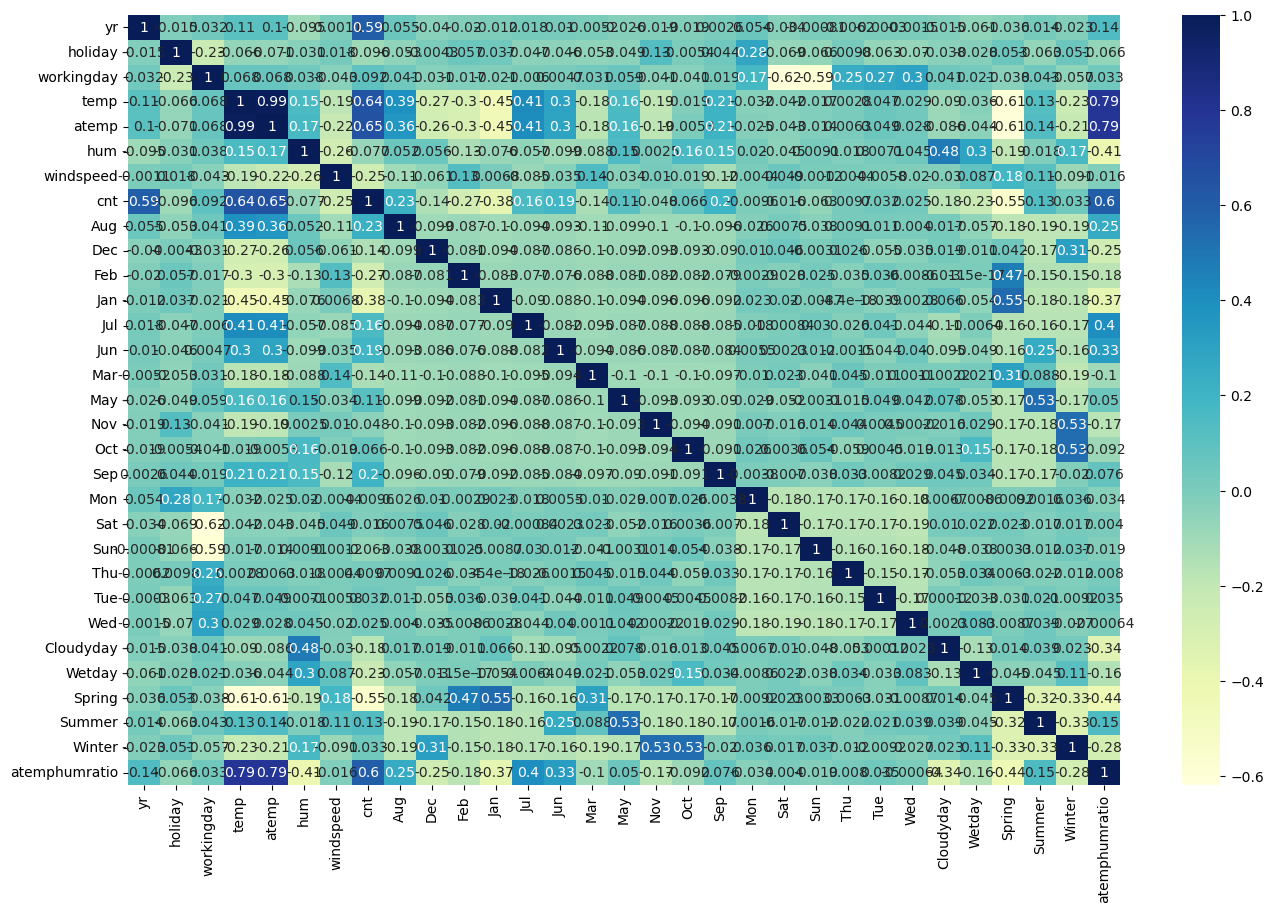

In [82]:
# Check the Heatmap among the model variables to identify variable with maximum correlation with target variable

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [83]:
# Define a function to build LR model based on input train dataframe and y-variable

def buildLRModel (X_train, y_train, y_var, x_vars):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[x_vars])

    # Create the fitted model
    return sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Divide the training set between X and y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [85]:
# Build the initial model with atemp as independent variable since it has the max correlation with cnt

# Create a first fitted model
demand_model_0 = buildLRModel(X_train, y_train, 'cnt', ['atemp'])

# Check the parameters of the model
demand_model_0.params

const    0.162924
atemp    0.683633
dtype: float64

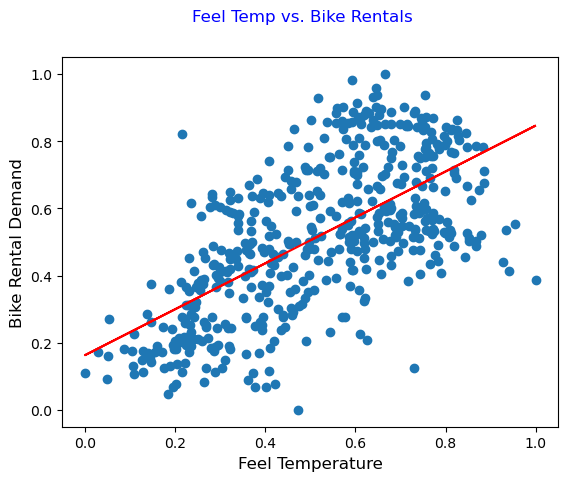

In [86]:
# Visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train['atemp'], y_train)
plt.plot(X_train['atemp'], demand_model_0.params.const + demand_model_0.params.atemp*X_train['atemp'], 'r')
plt.suptitle("Feel Temp vs. Bike Rentals", color='blue')
plt.xlabel('Feel Temperature', fontsize = 12)
plt.ylabel('Bike Rental Demand', fontsize = 12)
plt.show()

In [87]:
# Review the summary of the linear regression model obtained
print(demand_model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           1.10e-61
Time:                        22:13:02   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

#### 2.2 Finetune Model by Adding Features using Variable Selection Process

In [89]:
# We will now add more variables to the model to improve accuracy

# Create next fitted model by adding yr feature
demand_model_1 = buildLRModel(X_train, y_train, 'cnt', ['atemp', 'yr'])

# Check the summary of the model
print(demand_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.07e-131
Time:                        22:13:02   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

In [90]:
# Observations:
# The R-squared value has been improved significantly, we can keep yr variable in the model
# All the parameters have very low p-value, hence they are individually significant
# The probability (F-statistic) is close to zero. Hence the overall model is significant

In [91]:
# Create next fitted model by adding Spring feature
demand_model_2 = buildLRModel(X_train, y_train, 'cnt', ['atemp', 'yr', 'Spring'])

# Check the summary of the model
print(demand_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     482.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          5.58e-148
Time:                        22:13:02   Log-Likelihood:                 383.02
No. Observations:                 510   AIC:                            -758.0
Df Residuals:                     506   BIC:                            -741.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1942      0.019     10.238      0.0

In [92]:
# demand_model_2 Observations:
# The R-squared value has been improved slightly, we can keep Spring variable in the model
# All the parameters have very low p-value, hence they are individually significant
# The probability (F-statistic) is close to zero. Hence the overall model is significant

In [93]:
# Create next fitted model by adding Summer feature
demand_model_3 = buildLRModel(X_train, y_train, 'cnt', ['atemp', 'yr', 'Spring', 'Summer'])

# Check the summary of the model
print(demand_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     361.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.39e-147
Time:                        22:13:02   Log-Likelihood:                 383.37
No. Observations:                 510   AIC:                            -756.7
Df Residuals:                     505   BIC:                            -735.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1988      0.020     10.066      0.0

In [94]:
# demand_model_3 Observations:
# The R-squared value has NOT been improved
# Summer parameter has very high p-value, hence it is NOT individually significant. We can drop Summer variable from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [95]:
# Now we will add all the independent variables to the model

# Check the columns in X-train dataframe to ensure all the variables are present
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Cloudyday', 'Wetday',
       'Spring', 'Summer', 'Winter', 'atemphumratio'],
      dtype='object')

In [96]:
# Create the next model with all the features

demand_model_4 = buildLRModel(X_train, y_train, 'cnt', X_train.columns)

# Check the summary of the model
print(demand_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.63
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          4.37e-180
Time:                        22:13:02   Log-Likelihood:                 528.74
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     480   BIC:                            -870.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2422      0.039      6.180

In [97]:
# demand_model_4 Observations:
# The R-squared value has been improved significantly. Since the model includes all variables,
      # this is the max R-squared possible using current variables
# Many parameters have high p-value (>0.05), which potentially can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [98]:
# At this point, we will apply Recursive Feature Selection process to narrow down the significant features list from model
# In demdemand_model_4, there are 19 variables which seem to be insignificant (p value above 0.05)

# We will execute RFE with expected number of the variables equal to 18 to begin with
demand_lm_0 = LinearRegression()
demand_lm_0.fit(X_train, y_train)

rfe = RFE(demand_lm_0, n_features_to_select=18)             
rfe = rfe.fit(X_train, y_train)

# List down the RFE suggested columns
sel_cols = X_train.columns[rfe.support_]
sel_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Jan', 'Jul', 'Sep', 'Sat', 'Sun', 'Cloudyday', 'Wetday', 'Spring',
       'Summer', 'Winter', 'atemphumratio'],
      dtype='object')

In [99]:
# Create the next model with RFE selected features

demand_model_5 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     162.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.68e-189
Time:                        22:13:02   Log-Likelihood:                 520.85
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     492   BIC:                            -929.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2087      0.031      6.728

In [100]:
# demand_model_5 Observations:
# The R-squared value has been reduced slightly to 0.849.
# Three parameters have high p-value (>0.05); first atemp (having higher p-value) can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [101]:
# Create the next model after dropping atemp variable

sel_cols = sel_cols.drop('atemp')

demand_model_6 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.66e-190
Time:                        22:13:02   Log-Likelihood:                 520.56
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2020      0.030      6.805

In [102]:
# demand_model_6 Observations:
# The R-squared value has remained steady
# Two parameters have high p-value (>0.05); first holiday (having higher p-value) can be dropped from the model
# One parameter - atemp - has high p-value (>0.04), which can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [103]:
# Create the next model after dropping holiday variable

sel_cols = sel_cols.drop('holiday')

demand_model_7 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.66e-190
Time:                        22:13:02   Log-Likelihood:                 520.56
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1828      0.044      4.199

In [104]:
# demand_model_7 Observations:
# The R-squared value has remained steady
# One parameter - atemphumratio - has high p-value (>0.05), which can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [105]:
# Create the next model after dropping atemphumratio variable

sel_cols = sel_cols.drop('atemphumratio')

demand_model_8 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.09e-191
Time:                        22:13:02   Log-Likelihood:                 519.98
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1646      0.040      4.115      0.0

In [106]:
# demand_model_8 Observations:
# The R-squared value has remained steady. Same is Adj. R-squared
# No parameter is insignificant
# The probability (F-statistic) is close to zero. Hence the overall model is also significant

In [107]:
# Now we will check VIFs of the last selected variables to see if there is any collinearity among them

# Create a function that would compute VIFs for variables in input dataframe

def computeVIFs(train):
    vif = pd.DataFrame()
    vif['Features'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [108]:
# Compute the VIFs for currently selected columns

computeVIFs(X_train[sel_cols])

,Features,VIF
3,hum,21.63
2,temp,18.60
1,workingday,17.43
4,windspeed,5.06
12,Spring,4.81
8,Sat,4.70
9,Sun,4.53
14,Winter,3.51
13,Summer,2.94
10,Cloudyday,2.47


In [109]:
# From the above VIF list, it appears that hum variable has max VIF value. So this can be dropped.

sel_cols = sel_cols.drop('hum')

demand_model_9 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          7.33e-189
Time:                        22:13:02   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1175      0.039      3.012      0.0

In [110]:
# Compute the VIFs for currently selected columns

computeVIFs(X_train[sel_cols])

,Features,VIF
1,workingday,16.57
2,temp,13.12
3,windspeed,4.79
7,Sat,4.54
8,Sun,4.28
11,Spring,4.22
13,Winter,2.80
12,Summer,2.75
0,yr,2.08
4,Jan,1.65


In [111]:
# demand_model_9 Observations:
# The R-squared value has only slightly reduced to 0.843
# No parameter is insignificant
# The probability (F-statistic) is close to zero. Hence the overall model is significant
# There are two parameters with high VIF value (> 5.0)

In [112]:
# From the above VIF list, it appears that workingday variable has max VIF value. So this can be dropped.

sel_cols = sel_cols.drop('workingday')

demand_model_10 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.27e-186
Time:                        22:13:02   Log-Likelihood:                 503.07
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     496   BIC:                            -918.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2172      0.030      7.138      0.0

In [113]:
# demand_model_10 Observations:
# The R-squared value has slightly reduced
# # One parameter - Sat - has high p-value (>0.05), which can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is significant

In [114]:
# Create the next model after dropping Sat variable

sel_cols = sel_cols.drop('Sat')

demand_model_11 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.23e-187
Time:                        22:13:02   Log-Likelihood:                 502.08
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     497   BIC:                            -923.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2202      0.030      7.249      0.0

In [115]:
# Compute the VIFs for currently selected columns

computeVIFs(X_train[sel_cols])

,Features,VIF
1,temp,5.17
2,windspeed,4.61
9,Spring,2.77
10,Summer,2.23
0,yr,2.07
11,Winter,1.81
3,Jan,1.61
4,Jul,1.59
7,Cloudyday,1.56
5,Sep,1.33


In [116]:
# demand_model_11 Observations:
# The R-squared value has remained steady at 0.838
# No parameter is insignificant
# The probability (F-statistic) is close to zero. Hence the overall model is significant
# Only 'temp' parameter has slightly high VIF value (> 5.0). But the coefficient of temp in model is highest. Hence we shouldn't drop it
# Hence we can consider this as the most optimum model

### 3. Evaluate Model

#### 3.1 Analyse Residuals and Validate Model Assumptions

In [119]:
# We need to check if the error terms are normally distributed which is one of the major assumptions of linear regression
# let us plot the histogram of the error terms and see what it looks like

In [120]:
# Create the training set with finally selected features
X_train_final = X_train[sel_cols]

# Add a constant
X_train_final = sm.add_constant(X_train_final)

# Predict the target variable using final model
y_train_pred = demand_model_11.predict(X_train_final)

In [121]:
# Check the r-squared score from sklearn metric
print("r2_score for training set: " + str(r2_score(y_train, y_train_pred)))

r2_score for training set: 0.8376340585044233


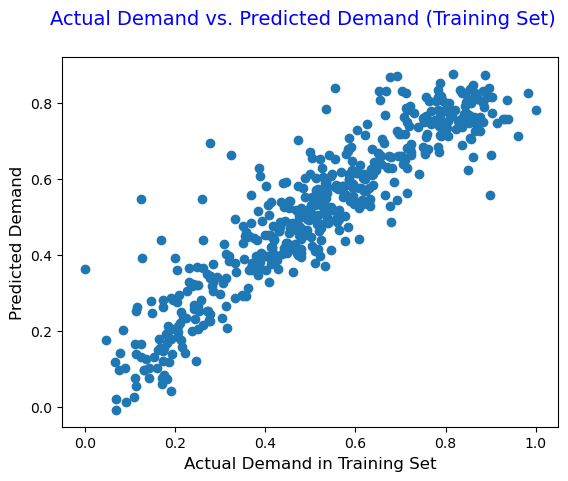

In [122]:
# Plot y_train and y_train_pred to review the spread of target variables in training data set

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('Actual Demand vs. Predicted Demand (Training Set)', fontsize = 14, color='blue')               
plt.xlabel('Actual Demand in Training Set', fontsize = 12)                          
plt.ylabel('Predicted Demand', fontsize = 12)
plt.show()

In [123]:
# Observation from distribution plot of actual vs. predicted demands in training data set:
# There is a strong linear relationship between actual & predicted demands with a slope equal to 1
# It validates that the relationship between selected independent variables and target variable is linear

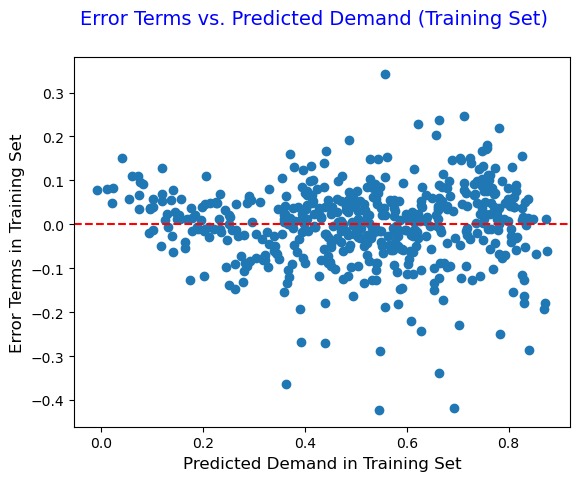

In [124]:
# Plot the Error Terms in training set against predicted target values to review their independency and homoscedasticity

# Visualise the Error Terms in Scatter Plot
fig = plt.figure()
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.axhline(y=0, color='r', linestyle='--')
fig.suptitle('Error Terms vs. Predicted Demand (Training Set)', fontsize = 14, color='blue')               
plt.xlabel('Predicted Demand in Training Set', fontsize = 12)                          
plt.ylabel('Error Terms in Training Set', fontsize = 12)
plt.show()

In [125]:
# Observations from the above plot:
# The above chart shows that the error terms are randomly distributed around y=0 horizontal line 
      # and there are no patterns among them. This validates that error terms are independent which is another assumption of linear model
# The above chart also shows that the error terms are somewhat uniformly distributed above and below the y=0 line indicating
    # that error terms have constant variance validating the homoscedasticity assumption of liner models

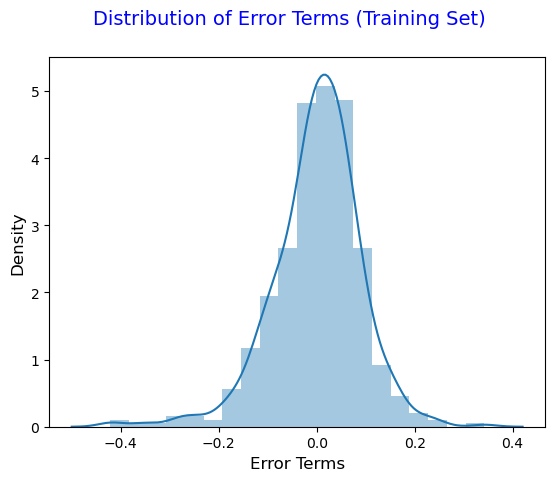

In [126]:
# Let's plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Error Terms (Training Set)', fontsize = 14, color='blue')                   
plt.xlabel('Error Terms', fontsize = 12)
plt.ylabel('Density', fontsize = 12) 
plt.show()

In [127]:
# Observations from error terms distribution plot:
# The distribution is normal
# The mean for the distribution is zero
# Hence the model assumption related to error terms (residuals) is valid

#### 3.2 Perform Prediction and Evaluate Final Model

In [129]:
# It's time now to make predictions using test dataset

# Apply scaling on test set using scaler created on train dataset
df_test[rev_num_var] = scaler.transform(df_test[rev_num_var])

In [130]:
# Review the scaling done on test dataset
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sun,Thu,Tue,Wed,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
184,0,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0.448463
535,1,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,0,0,...,0,0,0,1,0,0,0,1,0,0.541072
299,0,0,1,0.511964,0.496145,0.798722,0.334206,0.303382,0,0,...,0,1,0,0,1,0,0,0,1,0.193380
221,0,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,1,0,...,0,0,0,1,0,0,0,0,0,0.751766
152,0,0,1,0.817246,0.741471,0.149627,0.537414,0.569029,0,0,...,0,1,0,0,0,0,0,1,0,1.015081


In [131]:
# Divide the test dataset into X_test & y_test
y_test = df_test.pop('cnt')
X_test = df_test

# Keep only the final selected features in test dataset
X_test = X_test[sel_cols]

# Add a constant
X_test = sm.add_constant(X_test)

# Predict the target variable using final model
y_test_pred = demand_model_11.predict(X_test)

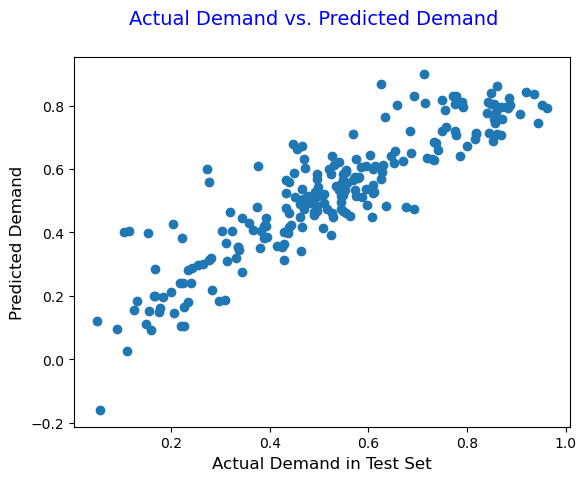

In [132]:
# Plot y_test and y_test_pred to review the spread of target variables

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual Demand vs. Predicted Demand', fontsize = 14, color='blue')               
plt.xlabel('Actual Demand in Test Set', fontsize = 12)                          
plt.ylabel('Predicted Demand', fontsize = 12)
plt.show()

In [133]:
# Observation from distribution plot of actual vs. predicted demands in test data set:
# There is a strong linear relationship between actual & predicted demands with a slope equal to 1
# It validates that the relationship between selected independent variables and target variable is linear

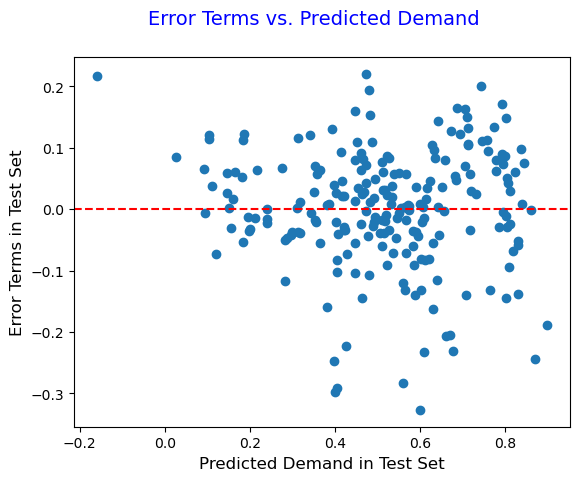

In [134]:
# Plot the Error Terms against predicted target values to review their independency and homoscedasticity

# Visualise the Error Terms in Scatter Plot
fig = plt.figure()
plt.scatter(y_test_pred, (y_test - y_test_pred))
plt.axhline(y=0, color='r', linestyle='--')
fig.suptitle('Error Terms vs. Predicted Demand', fontsize = 14, color='blue')               
plt.xlabel('Predicted Demand in Test Set', fontsize = 12)                          
plt.ylabel('Error Terms in Test Set', fontsize = 12)
plt.show()

In [135]:
# Observations from the above plot:
# The above chart shows that the error terms are randomly distributed around y=0 horizontal line 
      # and there are no patterns among them. This validates that error terms are independent which is another assumption of linear model

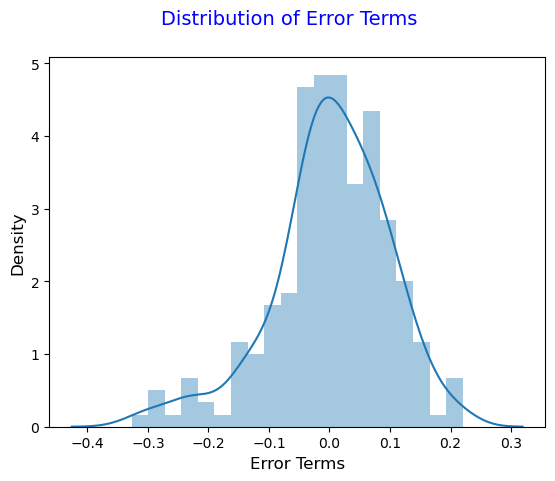

In [136]:
# Let's plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Distribution of Error Terms', fontsize = 14, color='blue')                   
plt.xlabel('Error Terms', fontsize = 12)
plt.ylabel('Density', fontsize = 12) 
plt.show()

In [137]:
# Observations from error terms distribution plot:
# The distribution is normal
# The mean for the distribution is zero
# Hence the model assumption related to error terms (residuals) is valid

In [138]:
# Calculate the R-squared score on the test set

print("r2 Score for the test set: " + str(r2_score(y_test, y_test_pred)))

r2 Score for the test set: 0.8025882353053516


In [139]:
# Observation:
# There is a high r2 score on the test dataset also
# This highlights that we have a very good model for the prediction of future bike demands

#### 3.3 Explain Final Model for Business Use

Equation of our best fitted line is:

$ cnt = 0.220 + 0.235  \times  yr + 0.473 \times temp - 0.157 \times windspeed - 0.040 \times Jan - 0.047 \times Jul + 0.072 \times Sep $

$ - 0.045 \times Sun - 0.081 \times Cloudyday - 0.287 \times Wetday - 0.062 \times Spring + 0.044 \times Summer + 0.077 \times Winter $


There are **twelve** factors that determine the bike demands in the subject locality for a day in year:

* **Rental Year &uarr;** - As the year progresses, bike demand is expected to rise, because of increased awareness about the facility among the users
* **Temperature &uarr;** - As the temperature increases (in otherwise cold climate), bike demand will grow significantly
* **Wind Speed &darr;** - On days wither high wind speed, demand is expected to fall
* **Jan &darr;/ July &darr;/ Sep &uarr;** - Demand will slightly fall in Jan & July, but increase in Sep
* **Sun &darr;** - Sundays will see slightly less demand as the office-going users will be less
* **Cloudyday &darr;/ Wetday &darr;** - Demand will be less compared to Clearday on days with heavy cloud or light rain/ snow.
* **Spring &darr;/ Summer &uarr;/ Winter &uarr;** - Demand will fall slightly in Spring, but increase in Summer & Winter due to higher temperature

**Usage Guideline for Prediction:**

1. One has to forecast the values like temperature, wind speed, cloudy or rainy day etc. for a target day, in order to plug-in those data into this equation to predict the bike rental demands

2. The value of the features should be scaled using the same scaler that was used to train the model before subsituting into the equation. E.g. if the temperature for the target day is predicted to be 33$\degree$C, then it should be scaled down to lie between 0 and 1 using the min & max values of temp column in training data set

3. Prediction should be done for **intrapolated** values and not **extrapolated** values as a general rule. E.g. if the Temperature values in training data set had a minimum of 2$\degree$C  and maximunm of 35$\degree$C, then predicting the demand for a temperature of 40$\degree$C should be avoided

4. The above rule may not be required for `yr` feature since the upward trend in using bike share facility over subsequent 3-4 years can be assumed to be stable and hence the same equation will hold. By following rule-2 above, while predicting demand for a day in 2021, the `yr` value should be substituted as 3